## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pltimage(img,title,value):
    plt.figure(figsize=(20,10))
    for i in range(value):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

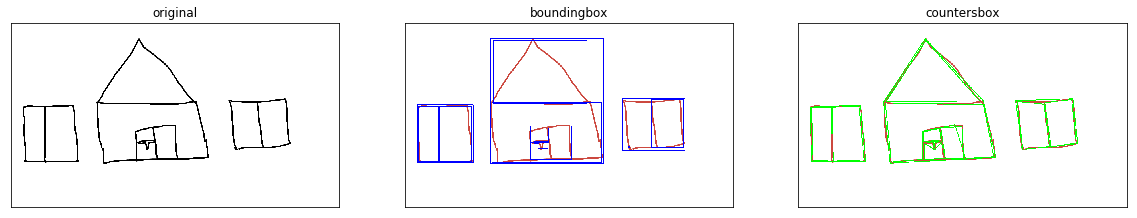

In [2]:
# Load image and keep a copy
image = cv2.imread('Input/Image/myhome.png')
orig_image = image.copy()
# cv2.imshow('Original Image', orig_image)
# cv2.waitKey(0) 

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    myrect = cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
#     cv2.imshow('Bounding Rectangle', orig_image)


    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    myploy = cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
#     cv2.imshow('Approx Poly DP', image)


titles = ['original','boundingbox','countersbox']
images = [gray,myrect,myploy]

pltimage(images,titles,3)

# cv2.waitKey(0)   
# cv2.destroyAllWindows()

### Convex hull

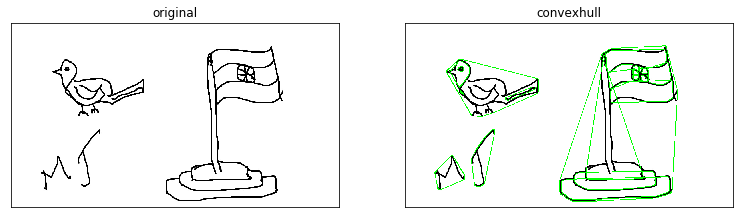

In [3]:
image = cv2.imread('Input/Image/Myart.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# cv2.imshow('Original Image', image)
# cv2.waitKey(0) 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    mycont = cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
#     cv2.imshow('Convex Hull', image)

titles = ['original','convexhull']
images = [gray,mycont]

pltimage(images,titles,2)

### Shape Matching

**cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)

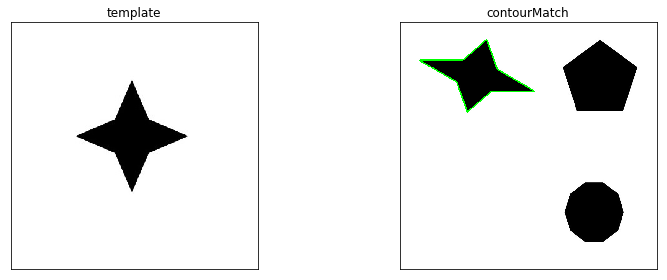

In [4]:
import cv2
import numpy as np
# Load the shape template or reference image
template = cv2.imread('Input/Image/4star.jpg',0)

# Load the target image with the shapes we're trying to match
target = cv2.imread('Input/Image/shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
_,contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
_,contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    #print(match)
    # If the match value is less than 0.15 we
    if match < 1.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
final = cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)

titles = ['template','contourMatch']
images = [template,final]

pltimage(images,titles,2)
